In [ ]:
pip install openpyxl


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


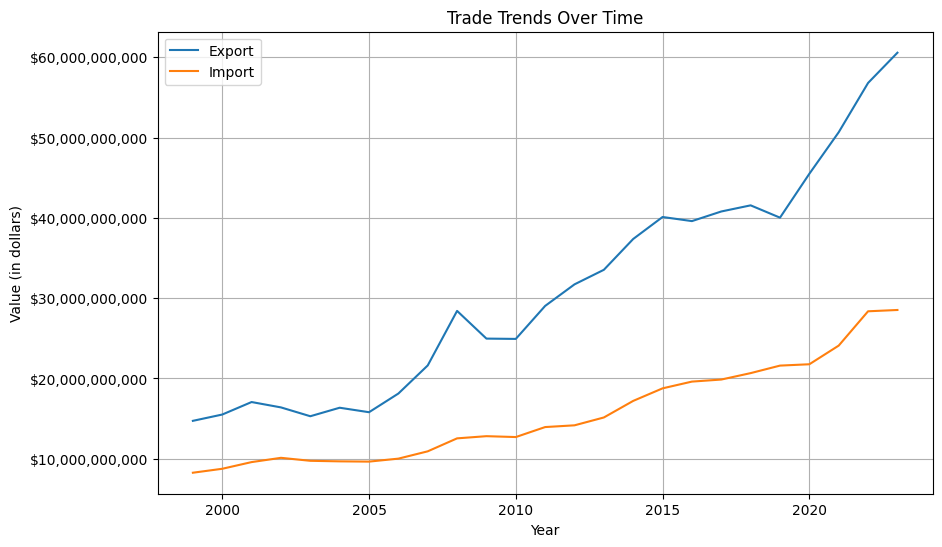

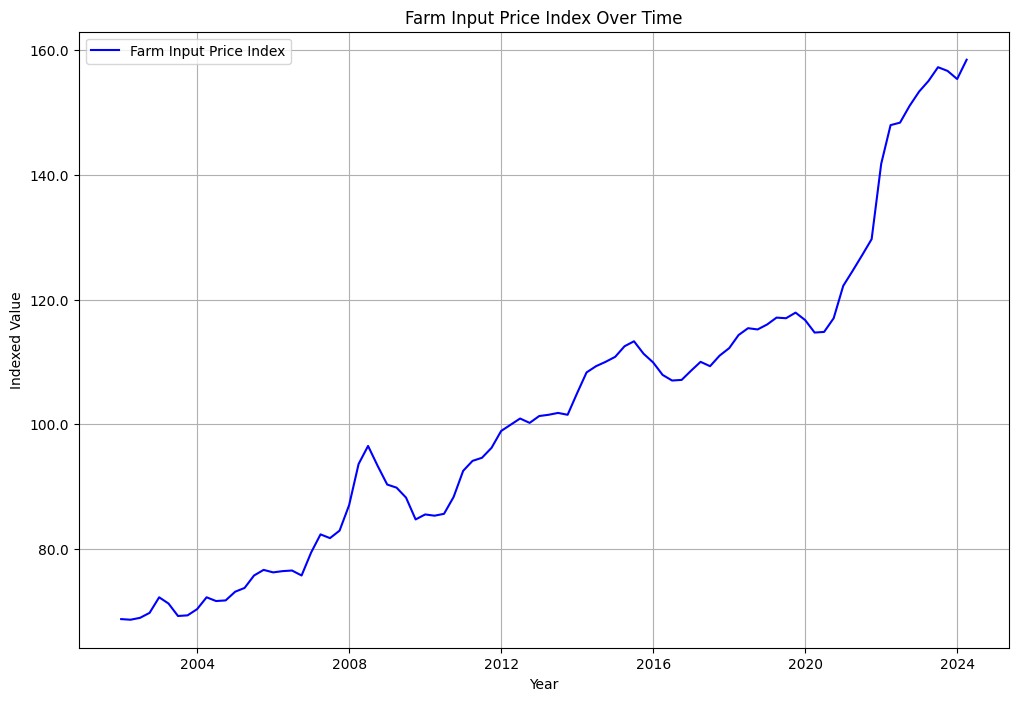

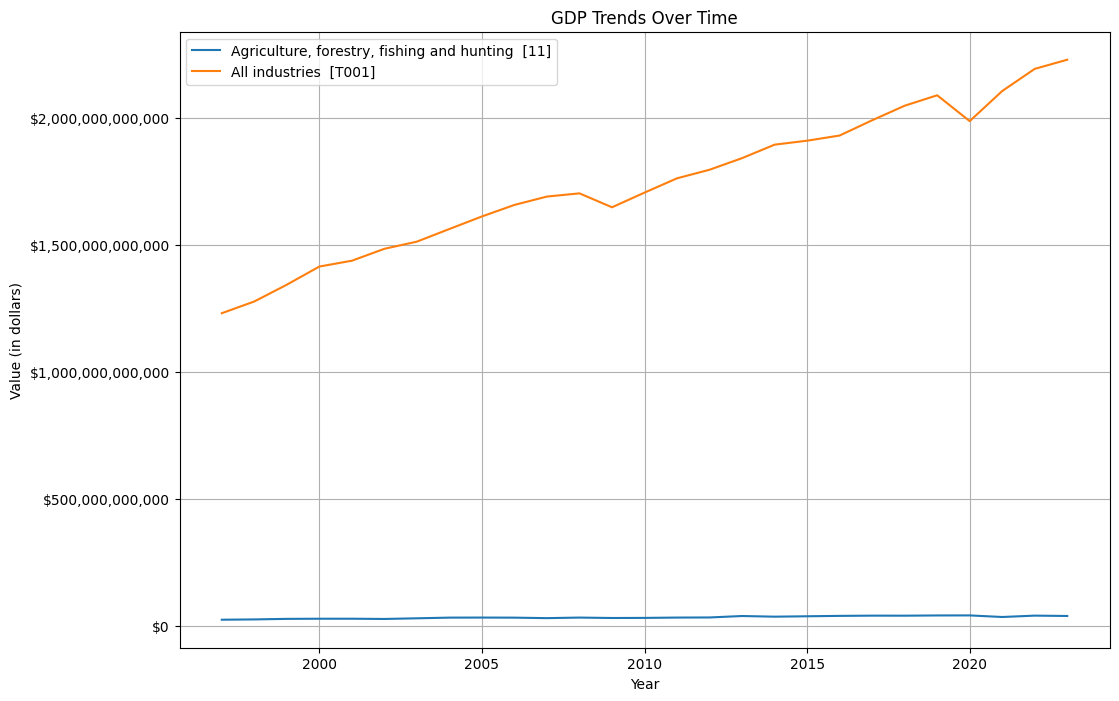

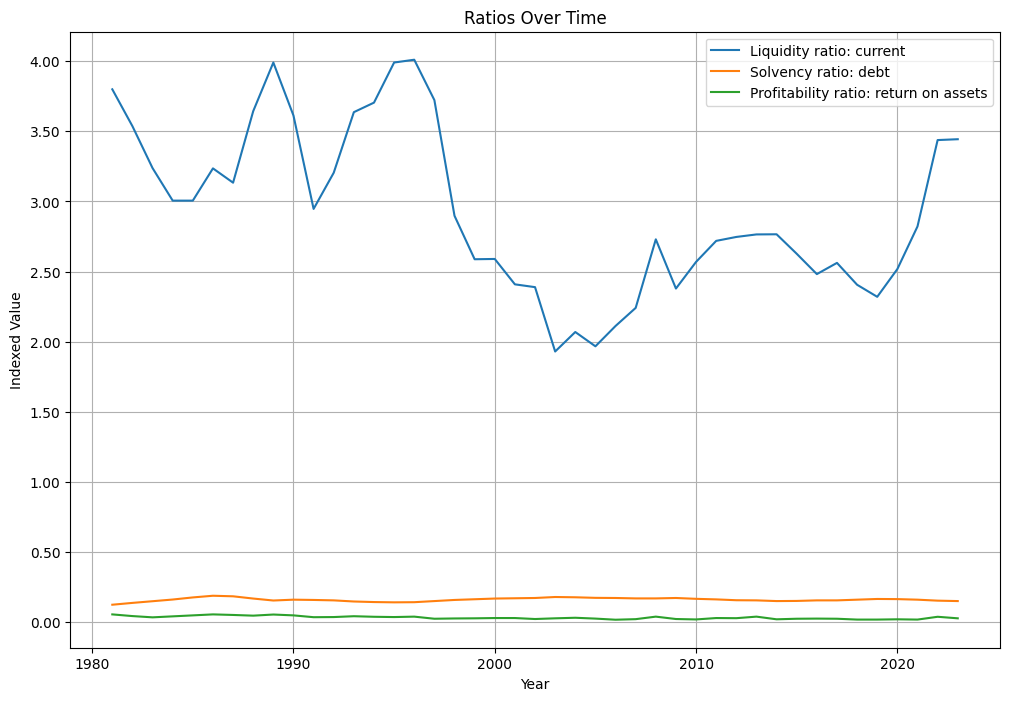

Ratio: Liquidity ratio: current, Mean: 2.93, Interpretation: Strong
Ratio: Solvency ratio: debt, Mean: 0.16, Interpretation: Very Strong
Ratio: Profitability ratio: return on assets, Mean: 0.03, Interpretation: Moderate


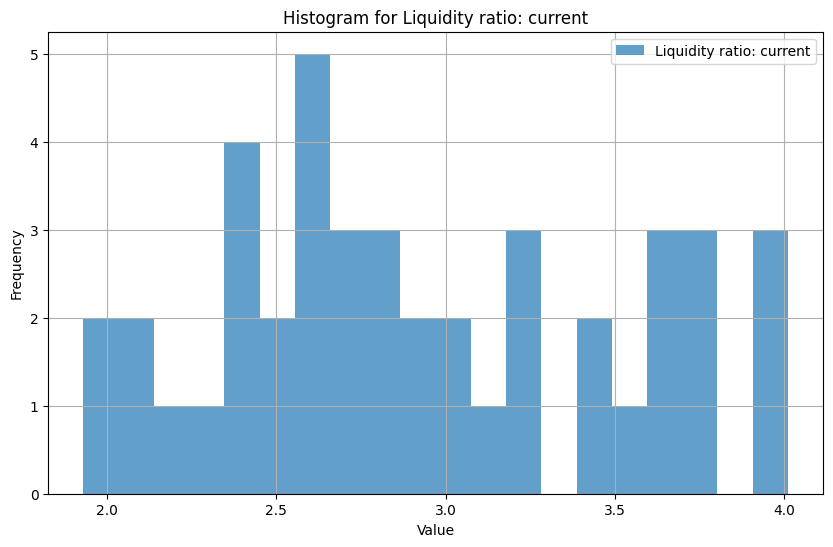

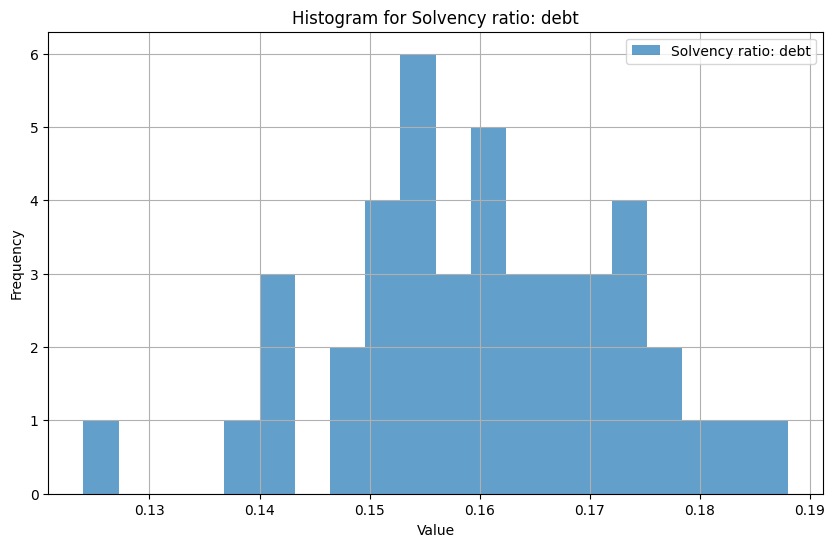

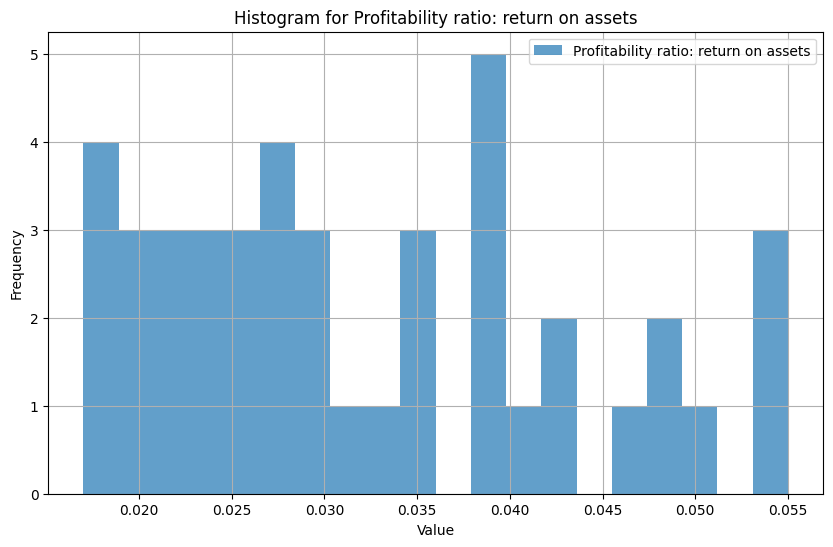

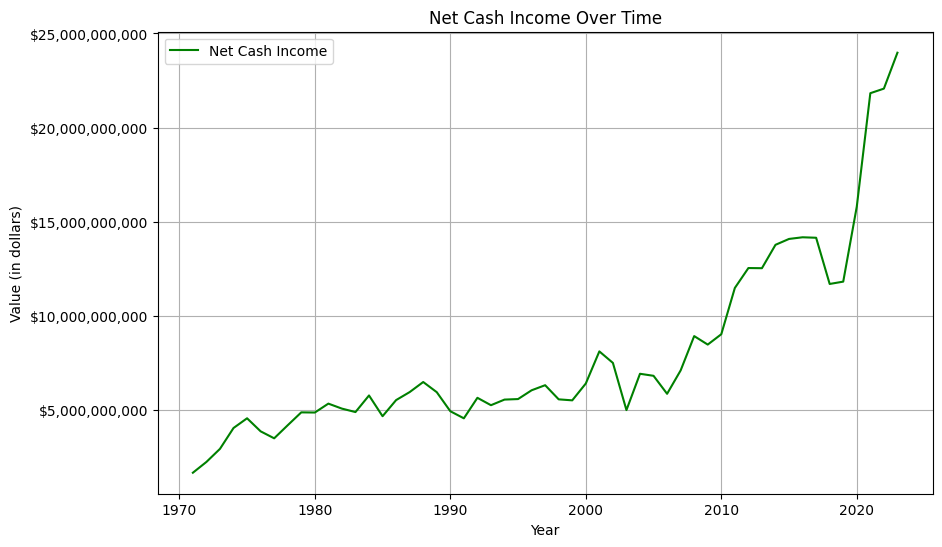


Summary Statistics for All Sheets (excluding 'Ratios'):
                 Trade  InputPriceIndex           GDP           NCI
Mean      2.330068e+10           102.16  8.887731e+11  7.958121e+09
Median    1.919173e+10           101.40  6.364745e+11  5.953352e+09
Skewness  1.110000e+00             0.63  1.500000e-01  1.650000e+00
Skewness for Trade (Original): 1.11
Skewness for Trade (Log Transformed): 0.24


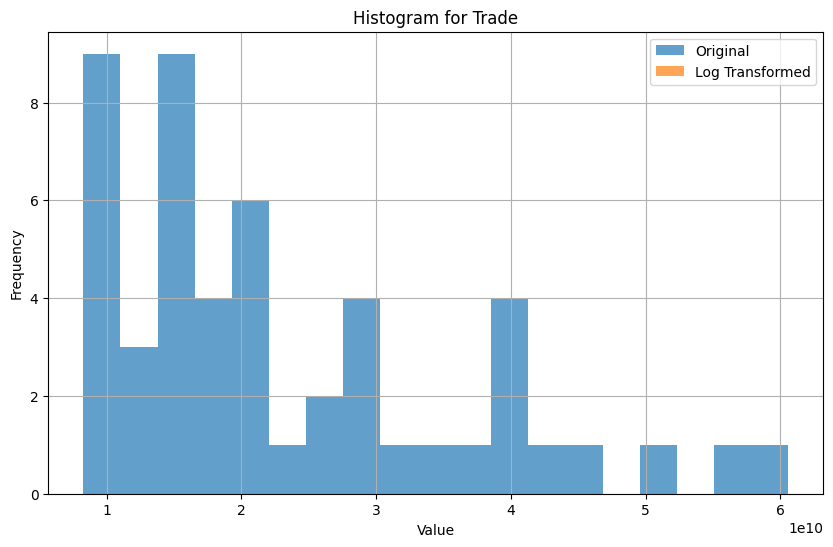

Skewness for InputPriceIndex (Original): 0.63
Skewness for InputPriceIndex (Log Transformed): 0.17


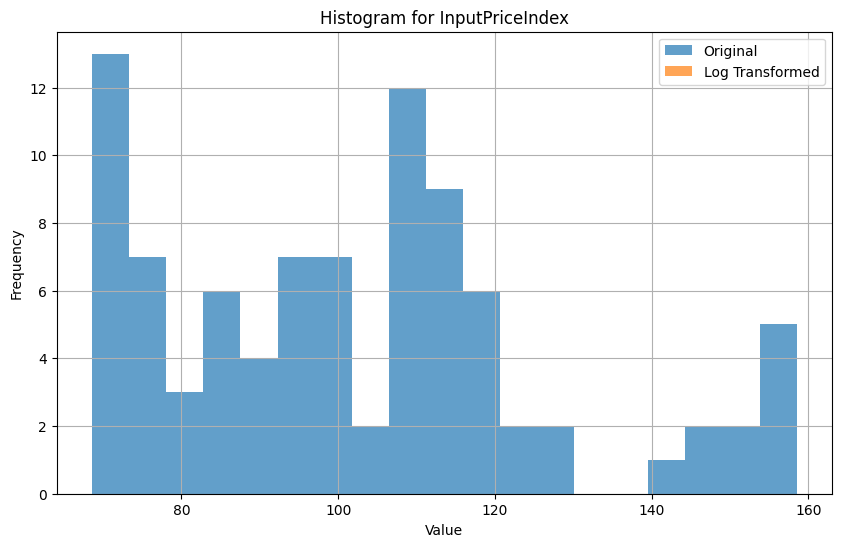

Skewness for GDP (Original): 0.15
Skewness for GDP (Log Transformed): 0.00


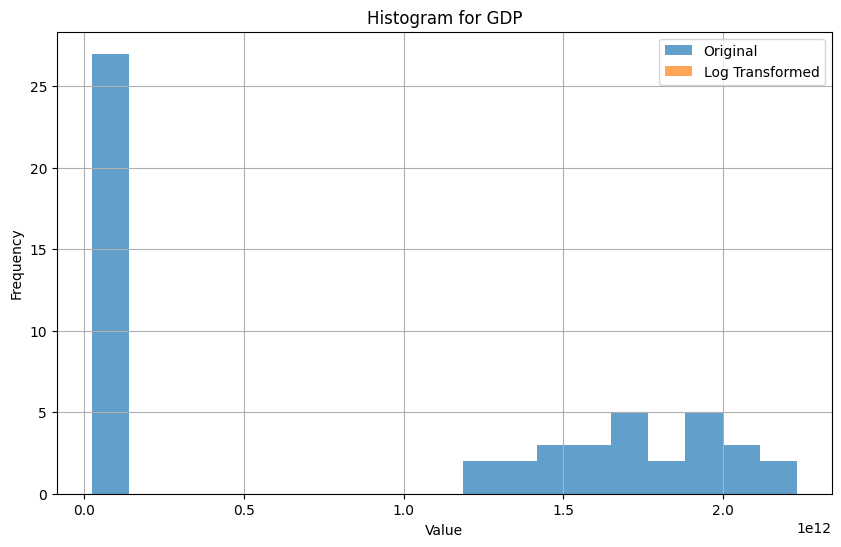

Skewness for NCI (Original): 1.65
Skewness for NCI (Log Transformed): 0.29


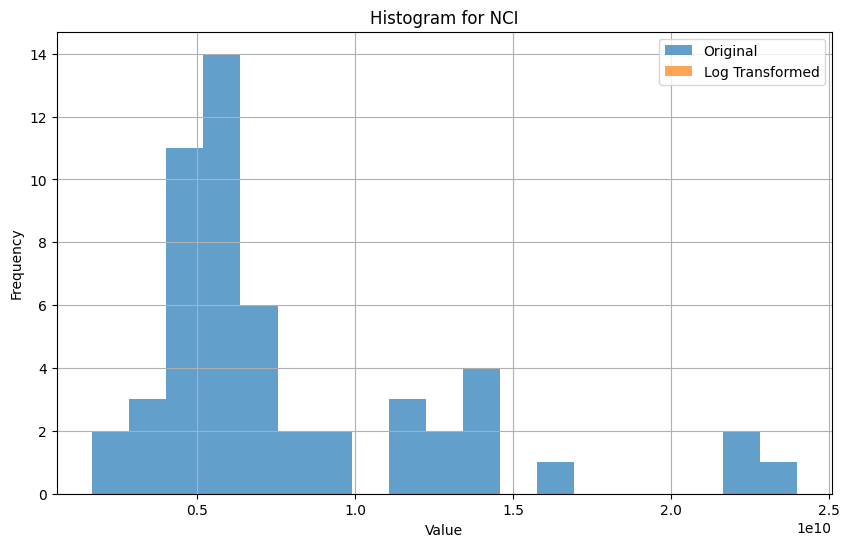

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# File path - Adjust as needed for your local environment
file_path = '/Users/mr.pannu/Downloads/JupyterNotebook Data.xlsx'

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Load each sheet into a dictionary of DataFrames
# This makes it easy to iterate over multiple sheets without writing repetitive code.
data_frames = {sheet: xls.parse(sheet) for sheet in xls.sheet_names}

# Function to process and analyze Trade data
def process_trade_data(df):
    # Check if required columns are present before proceeding
    if {'VALUE', 'REF_DATE', 'Trade'}.issubset(df.columns):
        # Summarize trade data by year and trade type
        trade_summary = df.groupby(['REF_DATE', 'Trade'])['VALUE'].sum().reset_index()
        
        # Plot trade trends over time to visualize growth and fluctuations in trade values
        plt.figure(figsize=(10, 6))
        for trade_type in trade_summary['Trade'].unique():
            subset = trade_summary[trade_summary['Trade'] == trade_type]
            plt.plot(subset['REF_DATE'], subset['VALUE'], label=trade_type)
        plt.title("Trade Trends Over Time")
        plt.xlabel("Year")
        plt.ylabel("Value (in dollars)")
        plt.legend()
        plt.grid(True)
        ax = plt.gca()
        ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
        plt.show()
        return trade_summary
    else:
        print("Trade data does not have the required columns.")
        return None

# Process Net Cash Income Data
def process_nci_data(df):
    # Check if required columns are present
    if {'VALUE', 'REF_DATE'}.issubset(df.columns):
        # Plot NCI to understand financial health over time
        plt.figure(figsize=(10, 6))
        plt.plot(df['REF_DATE'], df['VALUE'], label='Net Cash Income', color='green')
        plt.title("Net Cash Income Over Time")
        plt.xlabel("Year")
        plt.ylabel("Value (in dollars)")
        plt.grid(True)
        ax = plt.gca()
        ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
        plt.legend()
        plt.show()
        return df
    else:
        print("NCI data does not have the required columns.")
        return None

# Process Ratios Data
def process_ratios_data(df):
    # Ratios can help us understand the financial stability and performance metrics of farms
    if {'VALUE', 'REF_DATE', 'Ratio'}.issubset(df.columns):
        # Plot all ratios together for a high-level overview
        plt.figure(figsize=(12, 8))
        for ratio in df['Ratio'].unique():
            subset = df[df['Ratio'] == ratio]
            plt.plot(subset['REF_DATE'], subset['VALUE'], label=ratio)
        plt.title("Ratios Over Time")
        plt.xlabel("Year")
        plt.ylabel("Indexed Value")
        plt.legend()
        plt.grid(True)
        ax = plt.gca()
        ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.2f}'))
        plt.show()

        # Print interpretation based on mean values
        # The thresholds below are domain-specific and help us interpret the financial health.
        for ratio in df['Ratio'].unique():
            mean_value = df[df['Ratio'] == ratio]['VALUE'].mean()
            interpretation = "Moderate"
            if ratio == 'Liquidity ratio: current':
                # Current ratio > 1.5 is strong, <1.0 is weak, else moderate
                if mean_value > 1.5:
                    interpretation = "Strong"
                elif mean_value < 1.0:
                    interpretation = "Weak"
            elif ratio == 'Solvency ratio: debt':
                # Debt ratio <0.25 is very strong, >0.4 weak, in between is moderate
                if mean_value < 0.25:
                    interpretation = "Very Strong"
                elif mean_value > 0.4:
                    interpretation = "Weak"
            elif ratio == 'Profitability ratio: return on assets':
                # >0.05 very strong, <0.02 weak, else moderate
                if mean_value > 0.05:
                    interpretation = "Very Strong"
                elif mean_value < 0.02:
                    interpretation = "Weak"
            print(f"Ratio: {ratio}, Mean: {mean_value:.2f}, Interpretation: {interpretation}")

        # Plot separate histograms for each ratio to understand their distributions
        # This can reveal if a particular metric is heavily skewed or fairly distributed
        for ratio in df['Ratio'].unique():
            ratio_values = df[df['Ratio'] == ratio]['VALUE']
            plt.figure(figsize=(10, 6))
            plt.hist(ratio_values, bins=20, alpha=0.7, label=f"{ratio}")
            plt.title(f"Histogram for {ratio}")
            plt.xlabel("Value")
            plt.ylabel("Frequency")
            plt.legend()
            plt.grid(True)
            plt.show()

        return df
    else:
        print("Ratios data does not have the required columns.")
        return None

# Process GDP Data
def process_gdp_data(df):
    # GDP data by sector: helps us understand agriculture's contribution to the overall economy
    if {'VALUE', 'REF_DATE', 'North American Industry Classification System (NAICS)'}.issubset(df.columns):
        plt.figure(figsize=(12, 8))
        # Focus on Agriculture vs. All Industries for comparison
        for naics in ['Agriculture, forestry, fishing and hunting  [11]', 'All industries  [T001]']:
            subset = df[df['North American Industry Classification System (NAICS)'] == naics]
            plt.plot(subset['REF_DATE'], subset['VALUE'], label=naics)
        plt.title("GDP Trends Over Time")
        plt.xlabel("Year")
        plt.ylabel("Value (in dollars)")
        plt.legend()
        plt.grid(True)
        ax = plt.gca()
        ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
        plt.show()
        return df
    else:
        print("GDP data does not have the required columns.")
        return None

# Process Input Price Index Data
def process_input_price_index_data(df):
    # FIPI helps understand cost inflation or deflation in farming inputs over time
    if {'VALUE', 'REF_DATE', 'Price index'}.issubset(df.columns):
        plt.figure(figsize=(12, 8))
        plt.plot(df['REF_DATE'], df['VALUE'], label='Farm Input Price Index', color='blue')
        plt.title("Farm Input Price Index Over Time")
        plt.xlabel("Year")
        plt.ylabel("Indexed Value")
        plt.grid(True)
        ax = plt.gca()
        ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.1f}'))
        plt.legend()
        plt.show()
        return df
    else:
        print("Input Price Index data does not have the required columns.")
        return None

# General Analysis Function: Summary Statistics
def analyze_data(sheet_name, df):
    # Basic stats like mean, median, skewness help us understand the distribution
    # These stats provide a quick sanity check before more complex modeling
    if 'VALUE' in df.columns:
        summary = {
            "Mean": round(df['VALUE'].mean(), 2),
            "Median": round(df['VALUE'].median(), 2),
            "Skewness": round(df['VALUE'].skew(), 2)
        }
        return pd.DataFrame.from_dict(summary, orient='index', columns=[sheet_name])
    else:
        return None

# Transform skewed data to improve normality for better analysis
def transform_skewed_data(df):
    if 'VALUE' in df.columns:
        # Log transform reduces the impact of large outliers and makes data more "normal-like"
        df['LOG_VALUE'] = np.log1p(df['VALUE'])
        return df
    else:
        print("No 'VALUE' column found for transformation.")
        return df

# Histogram and Skewness Analysis
def analyze_histograms(df, sheet_name):
    # Histograms let us visualize data distribution at a glance
    if 'VALUE' in df.columns:
        print(f"Skewness for {sheet_name} (Original): {df['VALUE'].skew():.2f}")
        bins = np.linspace(df['VALUE'].min(), df['VALUE'].max(), 20)
        plt.figure(figsize=(10, 6))
        plt.hist(df['VALUE'], bins=bins, alpha=0.7, label='Original')
        # If log transformed data is available, compare the two distributions
        if 'LOG_VALUE' in df.columns:
            print(f"Skewness for {sheet_name} (Log Transformed): {df['LOG_VALUE'].skew():.2f}")
            plt.hist(df['LOG_VALUE'], bins=bins, alpha=0.7, label='Log Transformed')
        plt.title(f"Histogram for {sheet_name}")
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.legend()
        plt.grid(True)
        plt.show()

# Process all sheets
# This loop runs each sheet through the appropriate processing function if applicable
results = {}
for sheet_name, df in data_frames.items():
    if sheet_name == 'Trade':
        results[sheet_name] = process_trade_data(df)
    elif sheet_name == 'NCI':
        results[sheet_name] = process_nci_data(df)
    elif sheet_name == 'Ratios':
        results[sheet_name] = process_ratios_data(df)
    elif sheet_name == 'GDP':
        results[sheet_name] = process_gdp_data(df)
    elif sheet_name == 'InputPriceIndex':
        results[sheet_name] = process_input_price_index_data(df)

# Concatenate summary statistics for all sheets except 'Ratios' (since ratios are categorical metrics)
summary_statistics = pd.concat(
    [analyze_data(sheet_name, df) for sheet_name, df in data_frames.items()
     if analyze_data(sheet_name, df) is not None and sheet_name != 'Ratios'],
    axis=1
)

# Display Summary Statistics to understand overall data distributions
print("\nSummary Statistics for All Sheets (excluding 'Ratios'):")
print(summary_statistics)

# Save results for reference
summary_statistics.to_csv('/Users/mr.pannu/Downloads/summary_statistics.csv')

# Transform data and analyze histograms for skewness improvement
# Avoid doing this for 'Ratios' since it's not purely numeric like the others
for sheet_name, df in data_frames.items():
    if 'VALUE' in df.columns and sheet_name != 'Ratios':
        data_frames[sheet_name] = transform_skewed_data(df)
        analyze_histograms(data_frames[sheet_name], sheet_name)
